In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode 
import plotly.graph_objs as go # plotly graphical object
import warnings        # ignore filters
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style,
from subprocess import check_output
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS 
import datetime

In [113]:
data = pd.read_csv('/content/drive/MyDrive/DATA/Omenda_work/conflict_data_egy.csv')

In [114]:
data.head()

,id,relid,year,start_year,end_year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,iso3,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,NaN,NaN,#date+year,#date+year+start,#date+year+end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#group+name+first,NaN,NaN,#group+name+second,NaN,#meta+source,NaN,NaN,#description,NaN,NaN,#loc+name,NaN,#adm1+name,#adm2+name,#geo+lat,#country+code,#geo+lon,NaN,NaN,#country+name,NaN,#region+name,NaN,NaN,#date+start,#date+end,NaN,NaN,NaN,NaN,#affected+killed,NaN,NaN,NaN,NaN
1,180008.0,ISR-2010-1-381-3110,2010,2010,2010,0.0,Clear,1.0,234.0,234.0,Israel: Palestine,477.0,477.0,Government of Israel - Hamas,121.0,121.0,Government of Israel,209.0,209.0,Hamas,-1.0,"Reuters, 2010-01-06, ""UPDATE 2-Egypt, Hamas ex...",NaN,NaN,NaN,"Egyptian army, witnesses",1.0,Rafah border corssing,"Egyptian side of Rafah border crossing, Gaza S...",North Sinai governorate,NaN,31.247590,EGY,34.257429,POINT (34.257429 31.247590),174669.0,Egypt,651.0,Middle East,1.0,1.0,2010-01-06 00:00:00.000,2010-01-06 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,1.0,666.0,NaN
2,7198.0,EGY-1992-1-241-1,1992,1992,1992,0.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"Globe and Mail, 1992-08-24, ""WORLD IN BRIEF Cu...",NaN,NaN,NaN,police,1.0,Dayrut town,"Dayrut town, Assiut governorate",Assiut governorate,NaN,27.558611,EGY,30.807778,POINT (30.807778 27.558611),169622.0,Egypt,651.0,Middle East,1.0,1.0,1992-08-23 00:00:00.000,1992-08-23 00:00:00.000,0.0,7.0,0.0,0.0,7,7.0,7.0,651.0,NaN
3,7499.0,EGY-1992-1-241-2,1992,1992,1992,0.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"NY Times, 1992-12-10, ""Egypt Tightens the Net ...",NaN,NaN,NaN,police,2.0,Cairo city,Cairo city (near),Cairo governorate,NaN,30.050000,EGY,31.250000,POINT (31.250000 30.050000),173223.0,Egypt,651.0,Middle East,1.0,1.0,1992-12-09 00:00:00.000,1992-12-09 00:00:00.000,0.0,3.0,0.0,0.0,3,3.0,3.0,651.0,NaN
4,7501.0,EGY-1992-1-241-3,1992,1992,1992,0.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"Straits Times, 1992-12-13, ""Muslim militant ch...",NaN,NaN,NaN,police,1.0,Cairo city,Cairo city (Imbaba section/neighborhood),Cairo governorate,NaN,30.050000,EGY,31.250000,POINT (31.250000 30.050000),173223.0,Egypt,651.0,Middle East,1.0,2.0,1992-12-10 00:00:00.000,1992-12-13 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,1.0,651.0,NaN


In [115]:
data.shape

(846, 52)

In [116]:
data.columns

Index(['id', 'relid', 'year', 'start_year', 'end_year', 'active_year',
       'code_status', 'type_of_violence', 'conflict_dset_id',
       'conflict_new_id', 'conflict_name', 'dyad_dset_id', 'dyad_new_id',
       'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'iso3', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [117]:
#To filter the data to get only Egypt
data1 = data[data.country=='Egypt']
data1.head()

,id,relid,year,start_year,end_year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,iso3,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
1,180008.0,ISR-2010-1-381-3110,2010,2010,2010,0.0,Clear,1.0,234.0,234.0,Israel: Palestine,477.0,477.0,Government of Israel - Hamas,121.0,121.0,Government of Israel,209.0,209.0,Hamas,-1.0,"Reuters, 2010-01-06, ""UPDATE 2-Egypt, Hamas ex...",NaN,NaN,NaN,"Egyptian army, witnesses",1.0,Rafah border corssing,"Egyptian side of Rafah border crossing, Gaza S...",North Sinai governorate,NaN,31.247590,EGY,34.257429,POINT (34.257429 31.247590),174669.0,Egypt,651.0,Middle East,1.0,1.0,2010-01-06 00:00:00.000,2010-01-06 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,1.0,666.0,NaN
2,7198.0,EGY-1992-1-241-1,1992,1992,1992,0.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"Globe and Mail, 1992-08-24, ""WORLD IN BRIEF Cu...",NaN,NaN,NaN,police,1.0,Dayrut town,"Dayrut town, Assiut governorate",Assiut governorate,NaN,27.558611,EGY,30.807778,POINT (30.807778 27.558611),169622.0,Egypt,651.0,Middle East,1.0,1.0,1992-08-23 00:00:00.000,1992-08-23 00:00:00.000,0.0,7.0,0.0,0.0,7,7.0,7.0,651.0,NaN
3,7499.0,EGY-1992-1-241-2,1992,1992,1992,0.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"NY Times, 1992-12-10, ""Egypt Tightens the Net ...",NaN,NaN,NaN,police,2.0,Cairo city,Cairo city (near),Cairo governorate,NaN,30.050000,EGY,31.250000,POINT (31.250000 30.050000),173223.0,Egypt,651.0,Middle East,1.0,1.0,1992-12-09 00:00:00.000,1992-12-09 00:00:00.000,0.0,3.0,0.0,0.0,3,3.0,3.0,651.0,NaN
4,7501.0,EGY-1992-1-241-3,1992,1992,1992,0.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"Straits Times, 1992-12-13, ""Muslim militant ch...",NaN,NaN,NaN,police,1.0,Cairo city,Cairo city (Imbaba section/neighborhood),Cairo governorate,NaN,30.050000,EGY,31.250000,POINT (31.250000 30.050000),173223.0,Egypt,651.0,Middle East,1.0,2.0,1992-12-10 00:00:00.000,1992-12-13 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,1.0,651.0,NaN
5,7500.0,EGY-1993-1-241-1,1993,1993,1993,1.0,Clear,1.0,391.0,391.0,Egypt: Government,838.0,838.0,Government of Egypt - al-Gama'a al-Islamiyya,117.0,117.0,Government of Egypt,341.0,341.0,al-Gama'a al-Islamiyya,-1.0,"IHT, 1993-02-02, ""Egypt Myslims Call Raids 'Ho...",NaN,NaN,NaN,police,1.0,Cairo city,Cairo city (Bulaq district),Cairo governorate,NaN,30.050000,EGY,31.250000,POINT (31.250000 30.050000),173223.0,Egypt,651.0,Middle East,1.0,1.0,1993-01-24 00:00:00.000,1993-01-24 00:00:00.000,0.0,0.0,0.0,0.0,0,2.0,0.0,651.0,NaN


In [118]:
data.describe().applymap('{:,.2f}'.format)

,id,active_year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,side_a_dset_id,side_a_new_id,side_b_dset_id,side_b_new_id,number_of_sources,where_prec,priogrid_gid,country_id,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,high,low,gwnoa,gwnob
count,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,845.00,632.00,0.00
mean,"122,573.66",0.91,1.44,"5,778.89","5,760.69","7,475.88","7,594.19",393.46,393.46,"2,693.33",954.03,0.64,1.93,"171,779.60",651.00,1.05,1.23,1.04,3.12,1.34,0.36,6.60,5.29,651.02,nan
std,"117,064.43",0.29,0.77,"6,351.41","6,283.33","6,761.13","6,639.31",850.04,850.04,"3,767.43","1,769.56",2.67,1.35,"2,739.32",0.00,0.23,0.68,2.81,8.14,13.83,3.00,17.21,16.20,0.60,nan
min,"6,737.00",0.00,1.00,117.00,234.00,117.00,477.00,117.00,117.00,209.00,1.00,-1.00,1.00,"161,699.00",651.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,651.00,nan
25%,"7,294.00",1.00,1.00,391.00,391.00,838.00,838.00,117.00,117.00,234.00,234.00,-1.00,1.00,"169,622.00",651.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,651.00,nan
50%,"65,646.00",1.00,1.00,391.00,526.00,"5,570.00","5,570.00",117.00,117.00,341.00,234.00,1.00,1.00,"172,508.00",651.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,2.00,651.00,nan
75%,"239,559.00",1.00,2.00,"13,648.00","13,648.00","14,677.00","14,677.00",234.00,234.00,"4,319.00",341.00,1.00,2.00,"174,664.00",651.00,1.00,1.00,1.00,3.00,0.00,0.00,6.00,4.00,651.00,nan
max,"330,129.00",1.00,3.00,"14,044.00","13,648.00","15,262.00","15,262.00","5,792.00","5,792.00","9,999.00","6,844.00",39.00,6.00,"175,383.00",651.00,2.00,5.00,30.00,100.00,311.00,74.00,311.00,311.00,666.00,nan


In [119]:
data1.isnull().sum()

id                     0
relid                  0
year                   0
start_year             0
end_year               0
active_year            0
code_status            0
type_of_violence       0
conflict_dset_id       0
conflict_new_id        0
conflict_name          0
dyad_dset_id           0
dyad_new_id            0
dyad_name              0
side_a_dset_id         0
side_a_new_id          0
side_a                 0
side_b_dset_id         0
side_b_new_id          0
side_b                 0
number_of_sources      0
source_article         0
source_office        389
source_date          389
source_headline      389
source_original       24
where_prec             0
where_coordinates      0
where_description     15
adm_1                 38
adm_2                843
latitude               0
iso3                   0
longitude              0
geom_wkt               0
priogrid_gid           0
country                0
country_id             0
region                 0
event_clarity          0


In [120]:
data1['Total_death'] = data1['deaths_unknown'] + data1['deaths_civilians'] + data1['deaths_a'] + data1['deaths_b']

In [121]:
data1.rename({"where_coordinates":"Town","source_original":"Source"},axis = 1, inplace = True)

In [122]:
print("shape of dataset after filter:", data1.shape) 

shape of dataset after filter: (845, 53)


In [123]:
print('The Number of times each Region reported conflict')
data1['region'].value_counts()

The Number of times each Region reported conflict


Middle East    845
Name: region, dtype: int64

Cairo city reported the highest number of conflict

In [124]:
print('Total number of death per Region')
death_reg = data1[['region','Town','Total_death','deaths_civilians']]
death_reg.nlargest(20,'Total_death')


Total number of death per Region


,region,Town,Total_death,deaths_civilians
293,Middle East,Al-Rawdah village,311.0,311.0
270,Middle East,North Sinai governorate,224.0,224.0
543,Middle East,Ash Shaykh Zuwayd town,121.0,0.0
594,Middle East,North Sinai governorate,100.0,0.0
407,Middle East,Sharm el-Sheikh town,88.0,88.0
583,Middle East,Central Sinai governorate,85.0,0.0
427,Middle East,Port Said town,74.0,0.0
563,Middle East,North Sinai governorate,66.0,0.0
634,Middle East,Rafah town,63.0,0.0
403,Middle East,Luxor town,58.0,58.0


Al-Rawdah village had the highest number of civilian death. Although most region witnessed death but no live of civilian was lost

In [125]:
data1.columns

Index(['id', 'relid', 'year', 'start_year', 'end_year', 'active_year',
       'code_status', 'type_of_violence', 'conflict_dset_id',
       'conflict_new_id', 'conflict_name', 'dyad_dset_id', 'dyad_new_id',
       'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'Source', 'where_prec', 'Town', 'where_description', 'adm_1', 'adm_2',
       'latitude', 'iso3', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'high', 'low', 'gwnoa', 'gwnob',
       'Total_death'],
      dtype='object')

In [126]:
print("Source of the report per region")
source_reg = data1[['region','Town','Source']]
source_reg.head(20)

Source of the report per region


,region,Town,Source
1,Middle East,Rafah border corssing,"Egyptian army, witnesses"
2,Middle East,Dayrut town,police
3,Middle East,Cairo city,police
4,Middle East,Cairo city,police
5,Middle East,Cairo city,police
6,Middle East,Monfalut town,police
7,Middle East,Assiut governorate,police
8,Middle East,Aswan town,Interior Ministry
9,Middle East,Cairo city,Interior Ministry
10,Middle East,Aswan town,Interior Ministry


Police and Army mostly the source of report

Conflict description


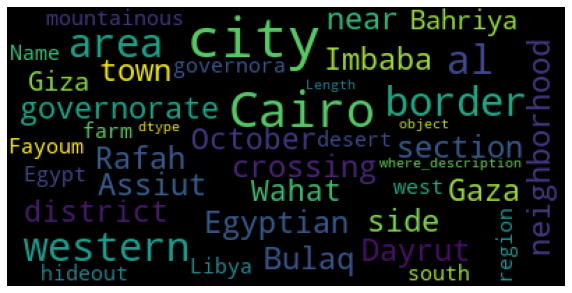

In [127]:
print('Conflict description')
mpl.rcParams['figure.figsize']=(10.0,6.0)    
mpl.rcParams['font.size']=15              
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=700,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data1['where_description']))

print(wordcloud)
fig = plt.figure(2)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

To get information from the date columns

In [128]:
data1.columns

Index(['id', 'relid', 'year', 'start_year', 'end_year', 'active_year',
       'code_status', 'type_of_violence', 'conflict_dset_id',
       'conflict_new_id', 'conflict_name', 'dyad_dset_id', 'dyad_new_id',
       'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'Source', 'where_prec', 'Town', 'where_description', 'adm_1', 'adm_2',
       'latitude', 'iso3', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'high', 'low', 'gwnoa', 'gwnob',
       'Total_death'],
      dtype='object')

In [129]:
data1['date_start']

1      2010-01-06 00:00:00.000
2      1992-08-23 00:00:00.000
3      1992-12-09 00:00:00.000
4      1992-12-10 00:00:00.000
5      1993-01-24 00:00:00.000
                ...           
841    2019-09-22 00:00:00.000
842    2017-10-20 00:00:00.000
843    2017-10-23 00:00:00.000
844    2017-10-27 00:00:00.000
845    2017-10-31 00:00:00.000
Name: date_start, Length: 845, dtype: object

In [130]:
#To convert the date column to a date 
data1['start_date']= pd.to_datetime(data1['date_start'])
data1['end_date'] = pd.to_datetime(data1['date_end'])
data1 = data1.drop(columns = ['date_end','date_end'],axis=1)

In [131]:
data1['year_start'] = data1.start_date.dt.year
data1['month_start'] = data1.start_date.dt.month
data1['year_end'] = data1.end_date.dt.year
data1['month_end'] = data1.end_date.dt.month

In [133]:
print("The year and month conflict started and ended in the region")
duration_conf = data1[['region','Town','year_start','month_start','year_end','month_end']]
duration_conf.head(20)

The year and month conflict started and ended in the region


,region,Town,year_start,month_start,year_end,month_end
1,Middle East,Rafah border corssing,2010,1,2010,1
2,Middle East,Dayrut town,1992,8,1992,8
3,Middle East,Cairo city,1992,12,1992,12
4,Middle East,Cairo city,1992,12,1992,12
5,Middle East,Cairo city,1993,1,1993,1
6,Middle East,Monfalut town,1993,2,1993,2
7,Middle East,Assiut governorate,1993,3,1993,3
8,Middle East,Aswan town,1993,3,1993,3
9,Middle East,Cairo city,1993,3,1993,3
10,Middle East,Aswan town,1993,3,1993,3


Most of the conflict started and ended in same year and month

Words that appears most in the articles publised


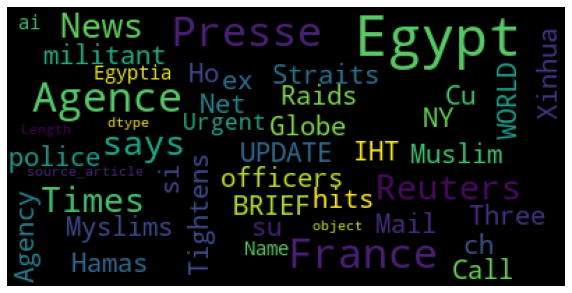

In [134]:
print('Words that appears most in the articles publised')
mpl.rcParams['figure.figsize']=(10.0,8.0)    
mpl.rcParams['font.size']=20             
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data1['source_article']))

print(wordcloud)
fig = plt.figure(2)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)